# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

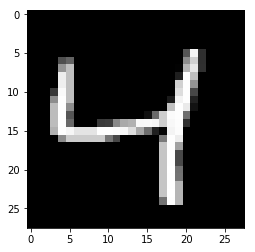

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [49]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]
print(mnist.train.images.shape)

# Input and target placeholders
inputs_  = tf.placeholder(tf.float32,[None,image_size])
targets_ = tf.placeholder(tf.float32,[None,image_size])

# Output of hidden layer, single fully connected layer here with ReLU activation

encoded = tf.layers.dense(inputs_,units=encoding_dim,activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, units=image_size,activation=None)
                        
# Sigmoid output from logits
decoded = tf.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits = logits,labels=targets_)

# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

(60000, 784)


## Training

In [45]:
print(inputs_._shape)
print(targets_._shape)
print(encoded._shape)
print(logits._shape)
print(decoded._shape)
# Create the session
sess = tf.Session()

(?, 784)
(?, 784)
(?, 32)
(?, 784)
(?, 784)


Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [46]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6947
Epoch: 1/20... Training loss: 0.6921
Epoch: 1/20... Training loss: 0.6895
Epoch: 1/20... Training loss: 0.6866
Epoch: 1/20... Training loss: 0.6830
Epoch: 1/20... Training loss: 0.6790
Epoch: 1/20... Training loss: 0.6731
Epoch: 1/20... Training loss: 0.6659
Epoch: 1/20... Training loss: 0.6574
Epoch: 1/20... Training loss: 0.6476
Epoch: 1/20... Training loss: 0.6381
Epoch: 1/20... Training loss: 0.6261
Epoch: 1/20... Training loss: 0.6117
Epoch: 1/20... Training loss: 0.5992
Epoch: 1/20... Training loss: 0.5839
Epoch: 1/20... Training loss: 0.5658
Epoch: 1/20... Training loss: 0.5514
Epoch: 1/20... Training loss: 0.5348
Epoch: 1/20... Training loss: 0.5138
Epoch: 1/20... Training loss: 0.4975
Epoch: 1/20... Training loss: 0.4796
Epoch: 1/20... Training loss: 0.4689
Epoch: 1/20... Training loss: 0.4463
Epoch: 1/20... Training loss: 0.4279
Epoch: 1/20... Training loss: 0.4164
Epoch: 1/20... Training loss: 0.4059
Epoch: 1/20... Training loss: 0.3889
E

Epoch: 1/20... Training loss: 0.1949
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1983
Epoch: 1/20... Training loss: 0.1967
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1898
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1951
Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1962
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1947
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1841
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1906
E

Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1636
Epoch: 2/20... Training loss: 0.1625
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1620
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1600
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1620
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1623
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1650
Epoch: 2/20... Training loss: 0.1624
Epoch: 2/20... Training loss: 0.1501
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1604
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1620
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1559
E

Epoch: 3/20... Training loss: 0.1441
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1409
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1428
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1432
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1412
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1308
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1413
E

Epoch: 4/20... Training loss: 0.1258
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1237
E

Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1117
Epoch: 4/20... Training loss: 0.1115
Epoch: 4/20... Training loss: 0.1173
Epoch: 5/20... Training loss: 0.1181
Epoch: 5/20... Training loss: 0.1174
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1187
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1171
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1166
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1175
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1168
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1144
E

Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1050
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1054
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1081
E

Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.0998
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1050
E

Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.1000
E

Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1005
E

Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0921
Epoch: 9/20... Training loss: 0.0952
E

Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0906
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... T

Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0913
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.1003
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0910
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0894
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0986
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0986
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0907
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0898
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0895
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0881
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0896
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0892
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0884
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0897
Epoch: 17/20... Training loss: 0.0897
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0992
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0975
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0985
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0894
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0895
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

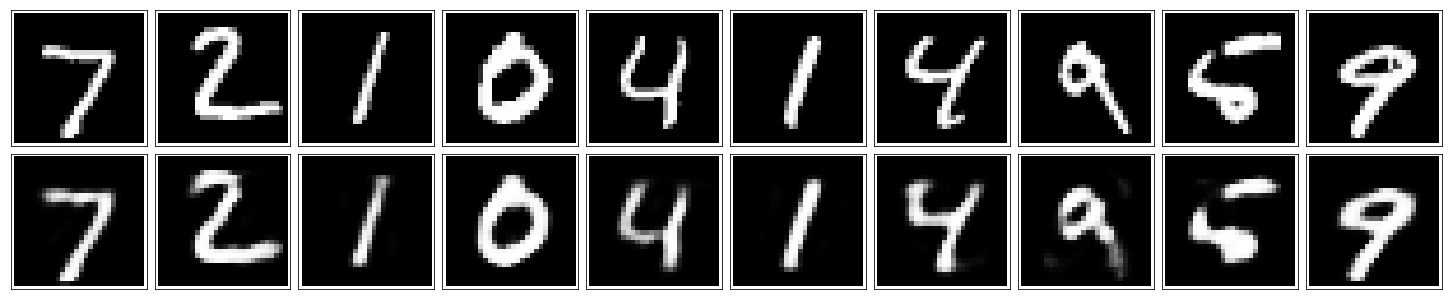

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [48]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.